In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
# data = np.load("grav_comp_data_commanded.npz")
# tau = data["tau"]
# tff = data["tff"]

data = np.load("grav_comp_data.npz")
tau = data["log_tau"]
tff = data["log_tff"]

In [68]:
tau.shape

(7747, 6)

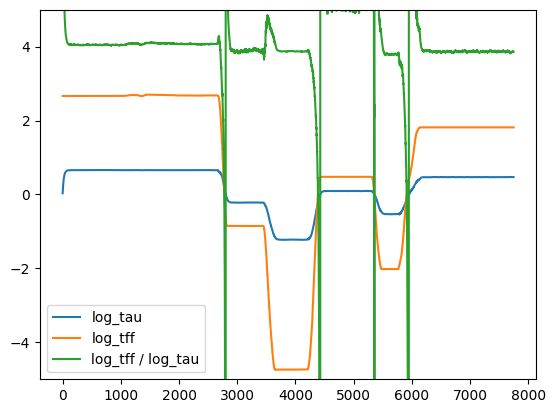

In [69]:
joint_num = 1

t = np.arange(tau[:, joint_num].shape[0])
plt.plot(t, tau[:, joint_num])
plt.plot(t, tff[:, joint_num])
plt.plot(t, tff[:, joint_num] / tau[:, joint_num])
plt.ylim(-5, 5)
plt.legend(['log_tau', 'log_tff', 'log_tff / log_tau'])

In [70]:
ratio = tff / tau
print(ratio.shape)

ratio[-1000, 4].mean()

(7747, 6)


0.6117963530158034

Joint 0: 0.011
Joint 1: 3.967
Joint 2: 3.509
Joint 3: -0.250
Joint 4: 0.603
Joint 5: 0.000


Text(0, 0.5, 'Ratio')

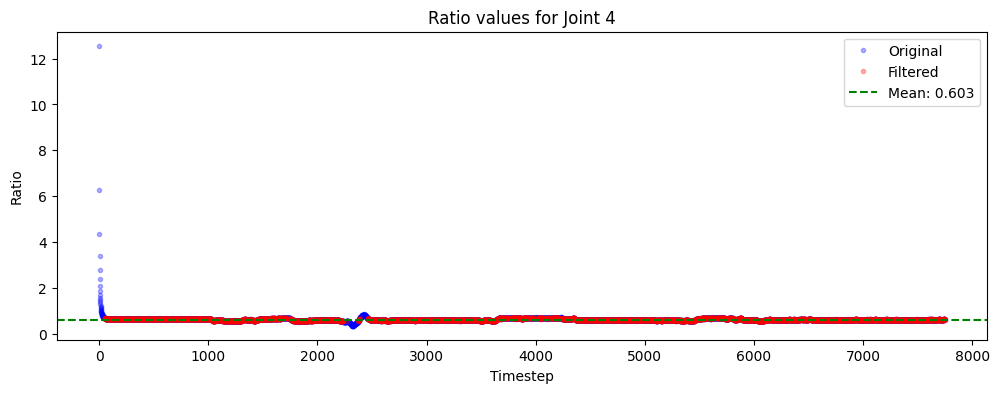

In [71]:
# Use robust statistical methods to find constant ratios for each joint
import numpy as np
from scipy import stats

# Calculate median and IQR for each joint
medians = np.median(ratio, axis=0)
q1 = np.percentile(ratio, 25, axis=0)
q3 = np.percentile(ratio, 75, axis=0)
iqr = q3 - q1

# Filter outliers using 1.5 * IQR rule
mask = np.abs(ratio - medians) <= 1.5 * iqr

# Calculate mean ratio for each joint excluding outliers
filtered_ratios = []
for joint in range(6):
    clean_data = ratio[mask[:, joint], joint]
    filtered_ratios.append(clean_data.mean())

filtered_ratios = np.array(filtered_ratios)

# Print results
for joint in range(6):
    print(f"Joint {joint}: {filtered_ratios[joint]:.3f}")

# Visualize the filtered data for one joint
joint_num = 4  # You can change this to view different joints
plt.figure(figsize=(12, 4))
plt.plot(t, ratio[:, joint_num], 'b.', alpha=0.3, label='Original')
plt.plot(t[mask[:, joint_num]], ratio[mask[:, joint_num], joint_num],
         'r.', alpha=0.3, label='Filtered')
plt.axhline(y=filtered_ratios[joint_num], color='g', linestyle='--',
            label=f'Mean: {filtered_ratios[joint_num]:.3f}')
plt.legend()
plt.title(f'Ratio values for Joint {joint_num}')
plt.xlabel('Timestep')
plt.ylabel('Ratio')

array([[-9.89227632e+00, -1.68558731e+01,  2.26140308e+00,
        -2.28592290e-02,  1.33793630e-01, -2.57279492e-05],
       [-9.89227632e+00, -1.68558731e+01,  2.26140308e+00,
        -2.28592290e-02,  1.33793630e-01, -2.57279492e-05],
       [-9.89227632e+00, -1.68558731e+01,  2.26140308e+00,
        -2.28592290e-02,  1.33793630e-01, -2.57279492e-05],
       ...,
       [-9.89227632e+00, -1.68558731e+01,  2.26140308e+00,
        -2.28592290e-02,  1.33793630e-01, -2.57279492e-05],
       [-9.89227632e+00, -1.68558731e+01,  2.26140308e+00,
        -2.28592290e-02,  1.33793630e-01, -2.57279492e-05],
       [-9.89227632e+00, -1.68558731e+01,  2.26140308e+00,
        -2.28592290e-02,  1.33793630e-01, -2.57279492e-05]])